In [14]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [15]:
MONGO_URI = "mongodb://localhost:27017/"
DATABASE_NAME = "traffic"  # << THAY TÊN DATABASE CỦA BẠN
COLLECTION_NAME = "traffic1" 

In [16]:
try:
    client = MongoClient(MONGO_URI)
    db = client[DATABASE_NAME]
    collection = db[COLLECTION_NAME]
    # Kiểm tra kết nối bằng cách lấy 1 document
    print("Kết nối thành công! Lấy một document mẫu:")
    print(collection.find_one())
except Exception as e:
    print(f"Lỗi kết nối: {e}")
    exit()

Kết nối thành công! Lấy một document mẫu:
{'_id': ObjectId('68dddf477e18603a590576d9'), 'count_point_id': 52, 'direction_of_travel': 'E', 'year': 2019, 'count_date': '2019-09-06', 'hour': 17, 'region_id': 1, 'region_name': 'South West', 'local_authority_id': 1, 'local_authority_name': 'Isles of Scilly', 'road_name': 'A3112', 'road_type': 'Major', 'start_junction_road_name': 'A3111', 'end_junction_road_name': 'A3110', 'easting': 91203, 'northing': 10217, 'latitude': 49.912239, 'longitude': -6.3028477, 'link_length_km': 2, 'link_length_miles': 1.24, 'pedal_cycles': 6, 'two_wheeled_motor_vehicles': 1, 'cars_and_taxis': 16, 'buses_and_coaches': 0, 'lgvs': 8, 'hgvs_2_rigid_axle': 0, 'hgvs_3_rigid_axle': 0, 'hgvs_4_or_more_rigid_axle': 0, 'hgvs_3_or_4_articulated_axle': 0, 'hgvs_5_articulated_axle': 0, 'hgvs_6_articulated_axle': 0, 'all_hgvs': 0, 'all_motor_vehicles': 25}


In [17]:
total_documents = collection.count_documents({})
print(f"Tổng số bản ghi (documents) trong collection: {total_documents:,}")

Tổng số bản ghi (documents) trong collection: 4,337,136


In [20]:
# --- 3. PHÂN TÍCH CẤU TRÚC DỮ LIỆU (SCHEMA) ---
# Vì NoSQL có schema linh hoạt, chúng ta cần tìm tất cả các trường có thể có
print("\n--- 3. PHÂN TÍCH CẤU TRÚC DỮ LIỆU ---")
print("Đang quét 4,337,136 bản ghi để tìm tất cả các trường (fields)...")
unique_fields = set()
for doc in collection.find({}, limit=4337136):
    unique_fields.update(doc.keys())

print(f"Tổng số trường duy nhất tìm thấy: {len(unique_fields)}")
print("Danh sách các trường:")
for field in sorted(list(unique_fields)):
    print(f"- {field}")



--- 3. PHÂN TÍCH CẤU TRÚC DỮ LIỆU ---
Đang quét 4,337,136 bản ghi để tìm tất cả các trường (fields)...
Tổng số trường duy nhất tìm thấy: 33
Danh sách các trường:
- _id
- all_hgvs
- all_motor_vehicles
- buses_and_coaches
- cars_and_taxis
- count_date
- count_point_id
- direction_of_travel
- easting
- end_junction_road_name
- hgvs_2_rigid_axle
- hgvs_3_or_4_articulated_axle
- hgvs_3_rigid_axle
- hgvs_4_or_more_rigid_axle
- hgvs_5_articulated_axle
- hgvs_6_articulated_axle
- hour
- latitude
- lgvs
- link_length_km
- link_length_miles
- local_authority_id
- local_authority_name
- longitude
- northing
- pedal_cycles
- region_id
- region_name
- road_name
- road_type
- start_junction_road_name
- two_wheeled_motor_vehicles
- year


In [22]:
SAMPLE_SIZE = 100000
print(f"\n--- 4. TẢI {SAMPLE_SIZE:,} BẢN GHI VÀO PANDAS ĐỂ PHÂN TÍCH SÂU ---")
cursor = collection.find().limit(SAMPLE_SIZE)
df = pd.DataFrame(list(cursor))
print("Tải dữ liệu vào DataFrame thành công. Thông tin DataFrame:")
df.info()

# Chuyển đổi kiểu dữ liệu cho phù hợp
df['count_date'] = pd.to_datetime(df['count_date'])
numeric_cols = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 
                'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


--- 4. TẢI 100,000 BẢN GHI VÀO PANDAS ĐỂ PHÂN TÍCH SÂU ---
Tải dữ liệu vào DataFrame thành công. Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           100000 non-null  object 
 1   count_point_id                100000 non-null  int64  
 2   direction_of_travel           100000 non-null  object 
 3   year                          100000 non-null  int64  
 4   count_date                    100000 non-null  object 
 5   hour                          100000 non-null  int64  
 6   region_id                     100000 non-null  int64  
 7   region_name                   100000 non-null  object 
 8   local_authority_id            100000 non-null  int64  
 9   local_authority_name          100000 non-null  object 
 10  road_name                     100000 non-null 

In [23]:
print("\n5.1. Thống kê các cột số (lưu lượng xe):")
print(df[numeric_cols].describe())


5.1. Thống kê các cột số (lưu lượng xe):
        pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
count  100000.000000               100000.000000   100000.000000   
mean        1.429310                    1.704980      251.693990   
std         4.169544                    4.241158      523.337164   
min         0.000000                    0.000000        0.000000   
25%         0.000000                    0.000000       15.000000   
50%         0.000000                    0.000000       56.000000   
75%         1.000000                    2.000000      229.000000   
max       190.000000                  111.000000     6272.000000   

       buses_and_coaches           lgvs       all_hgvs  all_motor_vehicles  
count      100000.000000  100000.000000  100000.000000       100000.000000  
mean            2.300160      49.817540      20.377590          325.894260  
std             5.354354     117.011828      73.055918          697.110068  
min             0.000000       0.0000

In [24]:
# 5.2 Thống kê các cột phân loại (Categorical)
print("\n5.2. Thống kê các cột phân loại:")
print("\nPhân bổ theo loại đường (road_type):")
print(df['road_type'].value_counts())

print("\nPhân bổ theo hướng di chuyển (direction_of_travel):")
print(df['direction_of_travel'].value_counts())


5.2. Thống kê các cột phân loại:

Phân bổ theo loại đường (road_type):
road_type
Minor    75936
Major    24064
Name: count, dtype: int64

Phân bổ theo hướng di chuyển (direction_of_travel):
direction_of_travel
W    25616
E    25580
N    24420
S    24384
Name: count, dtype: int64



--- 6. PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN ---

6.1. Tính toán lưu lượng trung bình theo giờ...
-> Đã lưu biểu đồ vào file hourly_traffic.png


C:\Users\DELL\AppData\Local\Temp\ipykernel_8680\4192206256.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette="viridis")


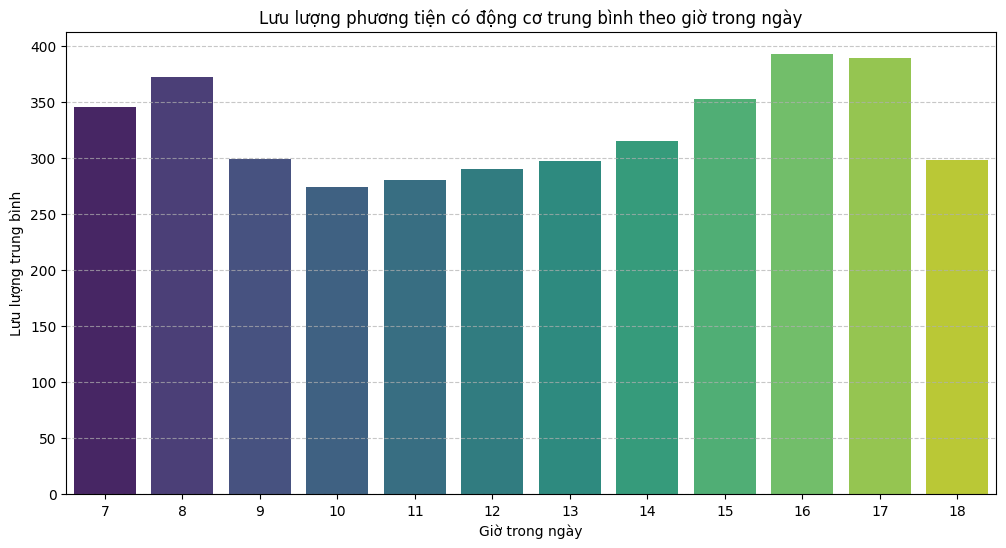

In [25]:
# --- 6. PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN ---
print("\n--- 6. PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN ---")

# 6.1 Lưu lượng trung bình theo giờ trong ngày (Tìm giờ cao điểm)
print("\n6.1. Tính toán lưu lượng trung bình theo giờ...")
hourly_traffic = df.groupby('hour')['all_motor_vehicles'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette="viridis")
plt.title('Lưu lượng phương tiện có động cơ trung bình theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Lưu lượng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('hourly_traffic.png')
print("-> Đã lưu biểu đồ vào file hourly_traffic.png")


6.2. Tính toán lưu lượng trung bình theo ngày trong tuần...
-> Đã lưu biểu đồ vào file daily_traffic.png


C:\Users\DELL\AppData\Local\Temp\ipykernel_8680\3666732356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="plasma")


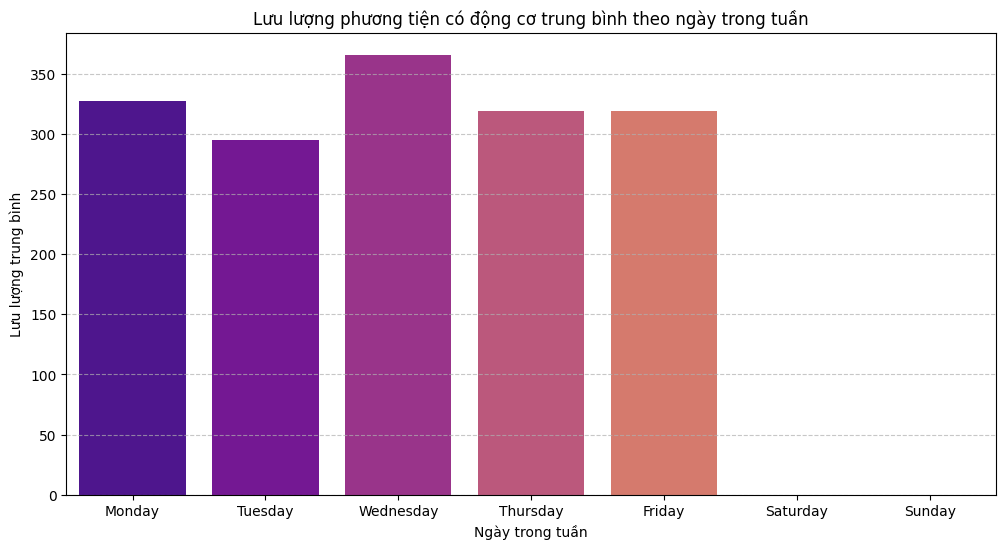

In [26]:
# 6.2 Lưu lượng trung bình theo ngày trong tuần
print("\n6.2. Tính toán lưu lượng trung bình theo ngày trong tuần...")
df['day_of_week'] = df['count_date'].dt.day_name()
daily_traffic = df.groupby('day_of_week')['all_motor_vehicles'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="plasma")
plt.title('Lưu lượng phương tiện có động cơ trung bình theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Lưu lượng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('daily_traffic.png')
print("-> Đã lưu biểu đồ vào file daily_traffic.png")


In [27]:
# --- 7. PHÂN TÍCH THEO VỊ TRÍ ---
print("\n--- 7. PHÂN TÍCH THEO VỊ TRÍ ---")

# 7.1 Top 10 con đường đông đúc nhất
print("\n7.1. Top 10 con đường đông đúc nhất (dựa trên tổng lưu lượng):")
top_roads = df.groupby('road_name')['all_motor_vehicles'].sum().nlargest(10)
print(top_roads)


--- 7. PHÂN TÍCH THEO VỊ TRÍ ---

7.1. Top 10 con đường đông đúc nhất (dựa trên tổng lưu lượng):
road_name
C      2036030
U      1868972
A38    1497179
M60    1399206
M5     1335163
M1     1222572
M4     1072725
M56     893708
M6      701956
A1      692959
Name: all_motor_vehicles, dtype: int64


In [28]:
print("\n7.2. Top 10 khu vực có nhiều điểm đếm nhất:")
top_authorities = df['local_authority_name'].value_counts().nlargest(10)
print(top_authorities)


7.2. Top 10 khu vực có nhiều điểm đếm nhất:
local_authority_name
Devon                                 9480
Derbyshire                            5508
Lincolnshire                          4992
Nottinghamshire                       4536
Somerset                              4044
Northamptonshire                      4044
Wiltshire                             3816
Leicestershire                        3264
Cornwall excluding Isles of Scilly    3156
Gloucestershire                       2964
Name: count, dtype: int64



Đang thực hiện truy vấn tổng hợp để thống kê lưu lượng xe theo năm...

--- KẾT QUẢ THỐNG KÊ LƯU LƯỢNG TỔNG CỘNG THEO NĂM ---

 year  total_cars_and_taxis  total_lgvs  total_buses_and_coaches  total_two_wheeled_motor_vehicles  total_all_motor_vehicles  record_count
 2000             100677849    15874559                  1428400                           1158822                 129879815        181668
 2001             107985870    17121975                  1584419                           1377795                 138900997        193344
 2002             104179345    16200579                  1520213                           1313449                 133478471        211200
 2003             103287887    16096236                  1565517                           1429841                 131965179        222636
 2004              97285597    15572605                  1496508                           1233381                 124689879        216852
 2005              92766517    15086367

C:\Users\DELL\AppData\Local\Temp\ipykernel_8680\803033534.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_all_motor_vehicles', data=df_yearly, palette="crest", label="Tổng phương tiện có động cơ")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8680\803033534.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])



-> Đã lưu biểu đồ thống kê theo năm vào file 'yearly_traffic_summary.png'


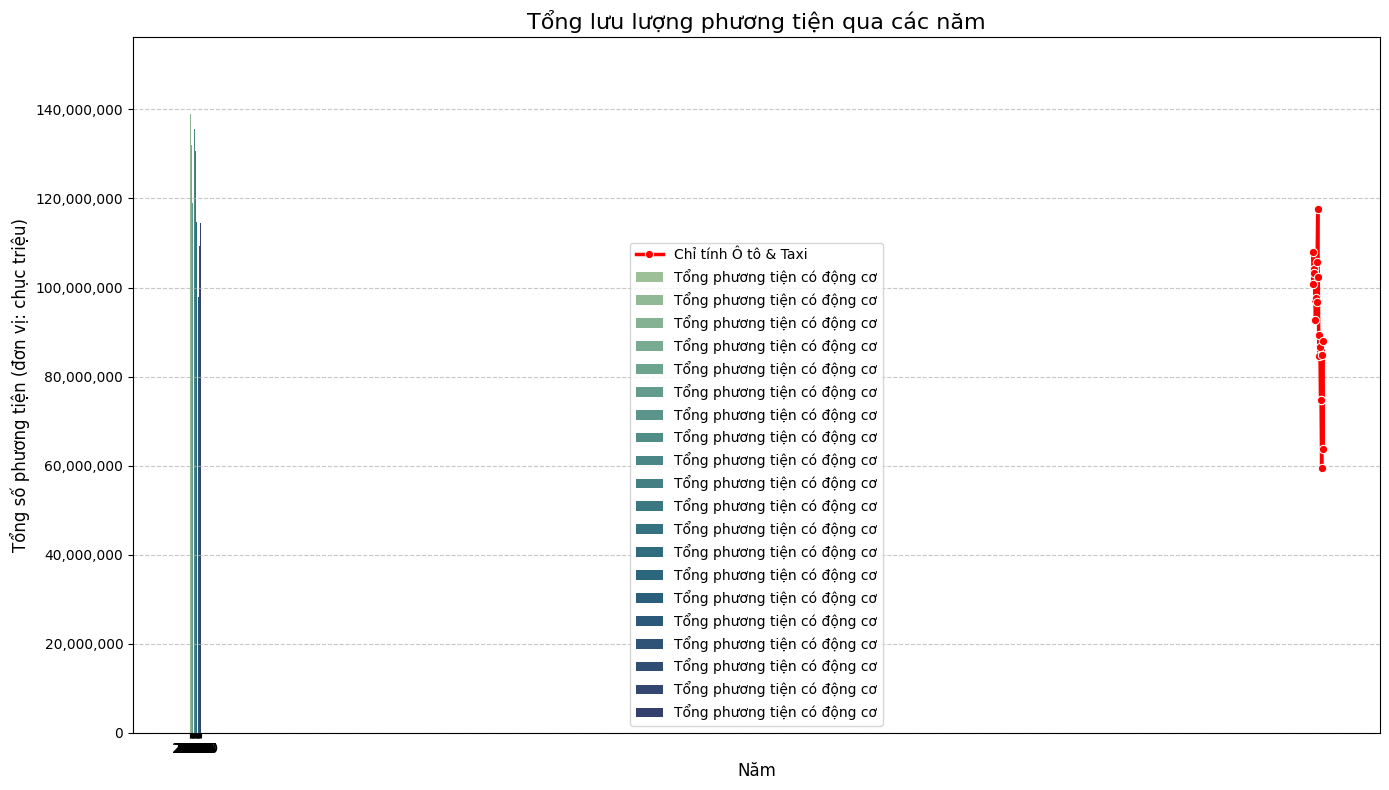

In [29]:
# --- THỐNG KÊ LƯU LƯỢNG XE THEO NĂM ---
print("\nĐang thực hiện truy vấn tổng hợp để thống kê lưu lượng xe theo năm...")

# Pipeline của Aggregation Framework
# 1. $group: Nhóm các document theo trường 'year'
# 2. $sum: Tính tổng của các trường lưu lượng cho mỗi nhóm
# 3. $sort: Sắp xếp kết quả theo năm tăng dần
pipeline = [
    {
        "$group": {
            "_id": "$year",  # Nhóm theo năm
            "total_cars_and_taxis": {"$sum": "$cars_and_taxis"},
            "total_lgvs": {"$sum": "$lgvs"},
            "total_buses_and_coaches": {"$sum": "$buses_and_coaches"},
            "total_two_wheeled_motor_vehicles": {"$sum": "$two_wheeled_motor_vehicles"},
            "total_all_motor_vehicles": {"$sum": "$all_motor_vehicles"},
            "record_count": {"$sum": 1} # Đếm số lượng bản ghi mỗi năm
        }
    },
    {
        "$sort": {"_id": 1}  # Sắp xếp theo năm (_id)
    }
]

# Thực thi pipeline
results = list(collection.aggregate(pipeline))

if not results:
    print("Không tìm thấy dữ liệu hoặc collection trống.")
else:
    # Chuyển kết quả sang DataFrame để dễ hiển thị và vẽ biểu đồ
    df_yearly = pd.DataFrame(results)
    df_yearly = df_yearly.rename(columns={"_id": "year"}) # Đổi tên cột _id thành year

    print("\n--- KẾT QUẢ THỐNG KÊ LƯU LƯỢNG TỔNG CỘNG THEO NĂM ---\n")
    print(df_yearly.to_string(index=False))

    # --- TRỰC QUAN HÓA KẾT QUẢ ---
    plt.figure(figsize=(14, 8))
    
    # Vẽ biểu đồ cột cho tổng số phương tiện có động cơ
    sns.barplot(x='year', y='total_all_motor_vehicles', data=df_yearly, palette="crest", label="Tổng phương tiện có động cơ")
    
    # Có thể vẽ thêm biểu đồ đường cho xe con/taxi để so sánh
    sns.lineplot(x='year', y='total_cars_and_taxis', data=df_yearly, marker='o', color='red', linewidth=2.5, label="Chỉ tính Ô tô & Taxi")

    plt.title('Tổng lưu lượng phương tiện qua các năm', fontsize=16)
    plt.xlabel('Năm', fontsize=12)
    plt.ylabel('Tổng số phương tiện (đơn vị: chục triệu)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    # Định dạng lại trục y cho dễ đọc
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    
    plt.tight_layout()
    plt.savefig('yearly_traffic_summary.png')
    print("\n-> Đã lưu biểu đồ thống kê theo năm vào file 'yearly_traffic_summary.png'")
    plt.show()